# **Business Problem**

1. person_age (float64)
The age of the individual applying for the loan.
Example: 22.0, 21.0, 25.0
Higher age may indicate more financial stability.
2. person_gender (object)
The gender of the loan applicant (e.g., "male", "female").
Example: "female", "male"
Could be used to study any gender-based trends in loan approval.
3. person_education (object)
The education level of the applicant.
Example: "High School", "Bachelor", "Master"
Higher education levels may correlate with better income and lower risk.
4. person_income (float64)
The annual income of the applicant in dollars.
Example: 71948.0, 12282.0, 12438.0
Higher income might mean lower risk for lenders.
5. person_emp_exp (int64)
Employment experience (in years) of the applicant.
Example: 0, 3, 1
More experience may indicate job stability.
6. person_home_ownership (object)
The type of home ownership status of the applicant.
Example: "RENT", "OWN", "MORTGAGE"
Homeowners might be considered lower risk than renters.
7. loan_amnt (float64)
The loan amount requested by the applicant.
Example: 35000.0, 1000.0, 5500.0
Higher loan amounts might have stricter approval criteria.
8. loan_intent (object)
The purpose for which the loan is intended.
Example: "PERSONAL", "EDUCATION", "MEDICAL"
Certain purposes (e.g., home loans) may have lower default rates.
9. loan_int_rate (float64)
The interest rate (%) assigned to the loan.
Example: 16.02, 11.14, 12.87
Higher interest rates may indicate higher risk loans.
10. loan_percent_income (float64)
The percentage of the applicant's income that the loan amount represents.
Example: 0.49, 0.08, 0.44
Lower values suggest the applicant can afford the loan more easily.
11. cb_person_cred_hist_length (float64)
Length of the applicant's credit history (in years).
Example: 3.0, 2.0, 4.0
Longer credit histories generally indicate more reliable borrowers.
12. credit_score (int64)
The credit score of the applicant (higher is better).
Example: 561, 504, 635
Lower credit scores indicate higher risk of default.
13. previous_loan_defaults_on_file (object)
Whether the applicant has defaulted on previous loans.
Example: "Yes", "No"
A "Yes" may indicate a higher risk of future default.
14. loan_status (int64)
The target variable: whether the loan was approved (1) or rejected (0).
Example: 1, 0, 1
Used for predictive modeling (loan approval classification).


# **Loading the Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('loan_data.csv')
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


# **Data Exploration**

In [3]:
df.shape

(45000, 14)

In [4]:
df.dtypes

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [6]:
for col in df.columns.tolist():
  print(col, ':')
  print(df[col].unique())
  print()

person_age :
[ 22.  21.  25.  23.  24.  26. 144. 123.  20.  32.  34.  29.  33.  28.
  35.  31.  27.  30.  36.  40.  50.  45.  37.  39.  44.  43.  41.  46.
  38.  47.  42.  48.  49.  58.  65.  51.  53.  66.  61.  54.  57.  59.
  62.  60.  55.  52.  64.  70.  78.  69.  56.  73.  63.  94.  80.  84.
  76.  67. 116. 109.]

person_gender :
['female' 'male']

person_education :
['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']

person_income :
[71948. 12282. 12438. ... 31924. 56942. 33164.]

person_emp_exp :
[  0   3   1   5   4   2   7   6 125   8 121 101 100  12  10   9  14  13
  11  15  16  17  19  28  25  18  24  22  20  23  21  31  26  27  29  32
  30 124  40  43  33  44  34  42  37  45  36  41  47  38  39  35  57  46
  49  48  50  76  62  61  58  93  85]

person_home_ownership :
['RENT' 'OWN' 'MORTGAGE' 'OTHER']

loan_amnt :
[35000.  1000.  5500. ... 12229.  2771.  6665.]

loan_intent :
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']

loan_i

In [7]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [8]:
continuous = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income',
              'cb_person_cred_hist_length', 'credit_score']

discrete_categorical = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 
                        'previous_loan_defaults_on_file']

discrete_count = ['loan_status']

time_series = []

**Descriptive Statistics**

In [9]:
df[continuous].describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000


In [10]:
df[discrete_categorical].describe()

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
count,45000,45000,45000,45000,45000
unique,2,5,4,6,2
top,male,Bachelor,RENT,EDUCATION,Yes
freq,24841,13399,23443,9153,22858


In [11]:
df[continuous].skew()

person_age                     2.548154
person_income                 34.137583
person_emp_exp                 2.594917
loan_amnt                      1.179731
loan_int_rate                  0.213784
loan_percent_income            1.034512
cb_person_cred_hist_length     1.631720
credit_score                  -0.610261
dtype: float64

In [12]:
df[continuous].corr()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
person_age,1.000000,0.193698,0.954412,0.050750,0.013402,-0.043299,0.861985,0.178432
person_income,0.193698,1.000000,0.185987,0.242290,0.001510,-0.234177,0.124316,0.035919
person_emp_exp,0.954412,0.185987,1.000000,0.044589,0.016631,-0.039862,0.824272,0.186196
loan_amnt,0.050750,0.242290,0.044589,1.000000,0.146093,0.593011,0.042969,0.009074
loan_int_rate,0.013402,0.001510,0.016631,0.146093,1.000000,0.125209,0.018008,0.011498
loan_percent_income,-0.043299,-0.234177,-0.039862,0.593011,0.125209,1.000000,-0.031868,-0.011483
cb_person_cred_hist_length,0.861985,0.124316,0.824272,0.042969,0.018008,-0.031868,1.000000,0.155204
credit_score,0.178432,0.035919,0.186196,0.009074,0.011498,-0.011483,0.155204,1.000000


In [13]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

**Plots**

In [15]:
i = 1
plt.figure(figsize = (20, 30), dpi = 500)
for col in continuous:
  plt.subplot(4, 2, i)
  sns.histplot(df[col], kde = True)
  i += 1
plt.show()

In [16]:
i = 1
plt.figure(figsize = (20, 30), dpi = 500)
for col in continuous:
  plt.subplot(4, 2, i)
  sns.boxplot(df[col])
  i += 1
plt.show()

<Axes: >

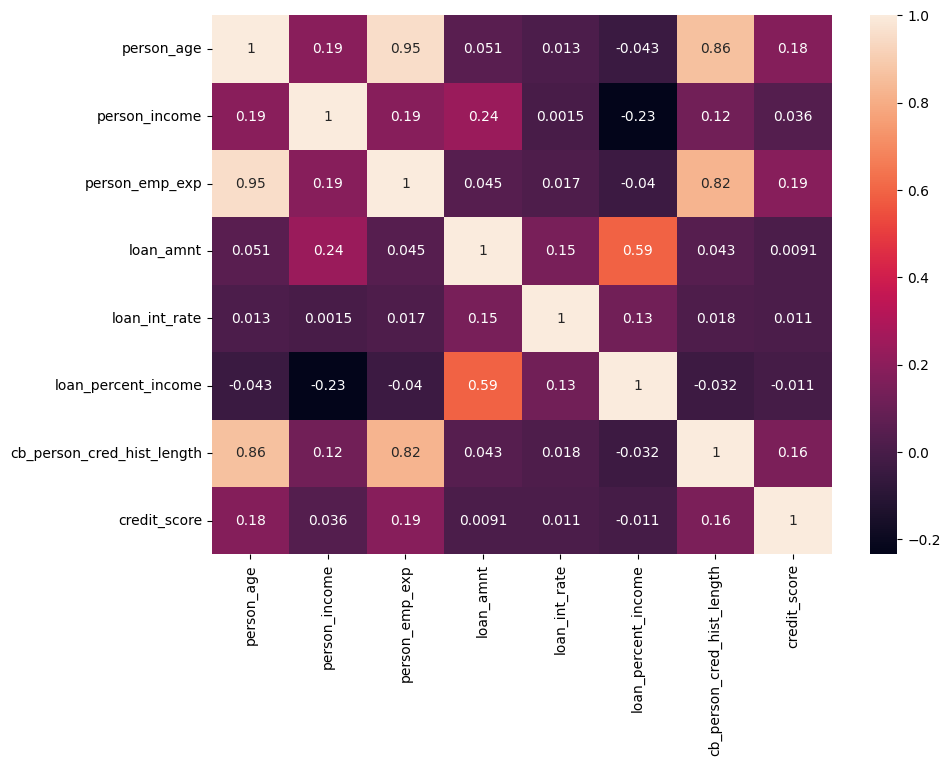

In [17]:
plt.figure(figsize = (10, 7))
sns.heatmap(df[continuous].corr(), annot = True)

# **Data Preprocessing**

# 1. Data Cleaning

No need and Retaining outliers

# 2. Data Wrangling

**1. Data Transformation**

In [20]:
skewed = df[continuous].skew()
skewed

person_age                    0.139352
person_income                -0.017895
person_emp_exp               -0.021322
loan_amnt                    -0.021640
loan_int_rate                 0.213784
loan_percent_income           0.091310
cb_person_cred_hist_length    0.073157
credit_score                 -0.610261
dtype: float64

In [19]:
from scipy.stats import yeojohnson

for col in skewed[skewed > 1].index.tolist():
  df[col], param = yeojohnson(df[col])

**2. Encoding**

In [36]:
df

,person_age,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,0.400566,3,7.006072,0.000000,44.917987,16.02,0.181526,1.032965,561,1,0,0,0,1,0,0,0,1,0,0
1,0.400547,0,6.315380,0.000000,17.190584,11.14,0.064709,0.867866,504,0,0,0,1,0,1,0,0,0,0,1
2,0.400608,0,6.320717,1.454795,27.670867,12.87,0.175722,1.032965,635,1,0,0,0,0,0,0,1,0,0,0
3,0.400582,2,7.042976,0.000000,44.917987,15.23,0.175722,0.867866,675,1,0,0,0,1,0,0,1,0,0,0
4,0.400596,3,6.975625,0.709998,44.917987,14.27,0.185437,1.147163,586,1,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,0.400628,1,6.857405,2.082661,36.095253,15.66,0.153877,1.032965,645,1,1,0,0,1,0,0,1,0,0,0
44996,0.400681,1,6.973782,3.198901,31.560065,14.07,0.098152,1.499655,621,1,0,0,0,1,0,1,0,0,0,0
44997,0.400666,1,6.920954,2.236097,22.949877,10.02,0.043657,1.470473,668,1,1,0,0,1,0,0,0,0,0,0
44998,0.400644,2,6.717148,1.702249,34.047524,13.23,0.163686,1.299172,604,1,1,0,0,1,1,0,0,0,0,0


In [24]:
nominal = ['person_gender', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
ordinal = ['person_education']

In [26]:
df['person_education'] = df['person_education'].replace({'High School' : 0, 'Associate' : 1, 'Bachelor' : 2, 'Master' : 3,
                                                         'Doctorate' : 4})

In [28]:
df = pd.get_dummies(df, drop_first = True, dtype = int)

In [30]:
df.to_csv('cleaned_loan_data.csv', index = False)

**Finding the best random_state value**

In [31]:
X = df.drop(columns = {'loan_status'})
y = df['loan_status']

In [38]:
Accuracy_Train = []
CV = []

for i in range(1, 100):
  #Train test split
  from sklearn.model_selection import train_test_split

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = i)

  #Scaling
  from sklearn.preprocessing import StandardScaler
  
  ss = StandardScaler()
  X_train.iloc[:, [0, 2, 3, 4, 5, 6, 7, 8]] = ss.fit_transform(X_train.iloc[:, [0, 2, 3, 4, 5, 6, 7, 8]])
  X_test.iloc[:, [0, 2, 3, 4, 5, 6, 7, 8]] = ss.transform(X_test.iloc[:, [0, 2, 3, 4, 5, 6, 7, 8]])

  #Modelling
  from sklearn.linear_model import LogisticRegression

  model = LogisticRegression(random_state = True)
  model.fit(X_train, y_train)

  #Prediction
  ypred_train = model.predict(X_train)

  #Evaluation
  from sklearn.metrics import accuracy_score

  accuracy_train = accuracy_score(y_train, ypred_train)

  from sklearn.model_selection import cross_val_score

  cv = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'accuracy').mean()

  Accuracy_Train.append(accuracy_train)
  CV.append(cv)

data1 = pd.DataFrame({'Accuracy_Train' : Accuracy_Train, 'CV' : CV})
data2 = data1[data1['Accuracy_Train'] - data1['CV'] <= 0.05]
data3 = data2[data2['CV'] == data2['CV'].max()]
rs = data3.index.tolist()[0]
rs

93